##Tarea 3

El objetivo de este taller es resolver el problema de clasificación de potabilidad de agua
usando los datos adjuntos. Divida apropiadamente los datos en conjuntos de entrenamiento y
prueba. A su vez, parte de los datos de entrenamiento se deben utilizar en los procedimientos
de selección de modelo.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Cargar los datos
datos = pd.read_csv('water_potability.csv').dropna()
print("Forma por defecto del dataset '.csv': \n", list(datos.keys()))

# 2. Preprocesar los datos si es necesario
X = datos.drop('Potability', axis=1)
y = datos['Potability']

# Lidiar con los valores nulos, normalizar, etc.
scaler = StandardScaler()
X_n= scaler.fit_transform(X)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=42)

Forma por defecto del dataset '.csv': 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


#1.
Resuelva el problema utilizando Random Forest. Seleccione el modelo apropiado por
validación cruzada. para esto entrene modelos con los siguientes parámetros:


*   Número de árboles: Por lo menos 4 valores escogidos entre 100 y 500,
*   Mínimo número de datos por hoja: Por lo menos 3 valores entre 2 y 30.




In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# Configurar la grilla de parámetros para Random Forest
params_RF = {
    'n_estimators'      :   [100, 200, 300, 500],  # Número de árboles
    'min_samples_leaf'  :            [2, 15, 30],  # Mínimo número de datos por hoja
}

# Crear y entrenar el clasificador Random Forest
RF = RandomForestClassifier(random_state=42)
cv_RF = GridSearchCV(estimator = RF, param_grid = params_RF) # Introducir los parámetros de validación cruzada
cv_RF.fit(X_train, y_train)

# Seleccionar el mejor modelo
mejor_RF = cv_RF.best_estimator_

# Evaluar el modelo seleccionado en el conjunto de prueba
y_pred_RF = mejor_RF.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# Stats
mejores_parametros_RF = cv_RF.best_params_
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Printer
print("-@Random Forest-")
print("\n Mejores parámetros: ",
      "\n - Número de árboles (estimadores):   ", list(mejores_parametros_RF.values())[0],
      "\n - Número de hojas (datos)        : ",   list(mejores_parametros_RF.values())[1])
print("\n Accuracy en conjunto de prueba:   ",    accuracy_RF)
print("\n Reporte: \n",      classification_report(y_test, y_pred_RF))

-@Random Forest-

 Mejores parámetros:  
 - Número de árboles (estimadores):    2 
 - Número de hojas (datos)        :  500

 Accuracy en conjunto de prueba:    0.6699751861042184

 Reporte: 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       231
           1       0.69      0.41      0.52       172

    accuracy                           0.67       403
   macro avg       0.68      0.64      0.63       403
weighted avg       0.67      0.67      0.65       403



#2.
Resuelva el problema utilizando Xgboost. Seleccione el modelo apropiado por validación cruzada. para esto entrene modelos con los siguientes parámetros:


*   Número de árboles: Por lo menos 8 valores escogidos entre 50 y 600,
*   Factor de encogimiento: Por lo menos 5 valores entre 0 y 1.




In [7]:
from xgboost import XGBClassifier

In [8]:
# Configurar la grilla de parámetros para XGBoost
params_XGB = {
    'n_estimators'    : [50, 100, 150, 200, 250, 300, 400, 600],  # Número de árboles
    'learning_rate'   :              [0.05, 0.1, 0.2, 0.3, 0.4],  # Factor de encogimiento
}

# Crear y entrenar el clasificador XGBoost
XGB = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
cv_XGB = GridSearchCV(estimator = XGB, param_grid = params_XGB) # Introducir los parámetros de validación cruzada
cv_XGB.fit(X_train, y_train)

# Seleccionar el mejor modelo
mejor_XGB = cv_XGB.best_estimator_

# Evaluar el modelo seleccionado en el conjunto de prueba
y_pred_XGB = mejor_XGB.predict(X_test)

In [9]:
# Stats
mejores_parametros_XGB = cv_XGB.best_params_
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

# Printer
print("-@XGBoost-")
print("\n Mejores parámetros: ",
      "\n - Número de árboles (estimadores)   :",           list(mejores_parametros_XGB.values())[0],
      "\n - Tasa de aprendizaje (encogimiento):  ",         list(mejores_parametros_XGB.values())[1])
print("\n Accuracy en conjunto de prueba:    ",    accuracy_XGB)
print("\n Reporte: \n",      classification_report(y_test, y_pred_XGB))

-@XGBoost-

 Mejores parámetros:  
 - Número de árboles (estimadores)   : 0.05 
 - Tasa de aprendizaje (encogimiento):   50

 Accuracy en conjunto de prueba:     0.630272952853598

 Reporte: 
               precision    recall  f1-score   support

           0       0.63      0.85      0.72       231
           1       0.62      0.34      0.44       172

    accuracy                           0.63       403
   macro avg       0.63      0.59      0.58       403
weighted avg       0.63      0.63      0.60       403



#3.
Escriba su propia implementación de Adaboost, usando como clasificador base decision
stumps (es decir árboles de decisión con sólo un nivel). Escriba su propia implementación de la rutina de entrenamiento de los clasificadores base. Entrene un modelo con
600 clasificadores base y grafique curvas de errores de entrenamiento y validación que
le permitan seleccionar un modelo con un número apropiado de clasificadores base.


In [10]:
features = list(datos.keys())
features.remove('Potability')
X_train3, X_temp3, y_train3, y_temp3 = train_test_split(datos[features], datos['Potability'], test_size=0.2)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_temp3, y_temp3, test_size=0.5)

In [11]:
"""
Aquí secuestramos la función para normalizar que habíamos hecho en la tarea 1. Y luego la usamos para normalizar los datos de la tarea 3, en el punto 3.
Los datos de validación y test se normalizaron con la media y la desviación de los datos de entrenamiento
"""
parametros_train = dict(map(lambda x: (x, {'media': np.mean(X_train3[x]), 'desviacion': np.std(X_train3[x])}), X_train3.keys()))
def normalizar(dataSet, features, parametros = []):
    """
    Esta función resta la media y luego divide entre la desviación estandar de cada dato en cada columna. Si se le especifica la media y la desviación en los parámetros 
    Usa esa media y desviación dada, de lo contrario, calcula la media y la desviación de cada columna especificada en "features"
    @input: dataSet <pd.DataFrame>: Tabla de datos a la que se le va a dar normalización a la columans dadas
    @input: features <list>: lista de "features" o columnas que se van a normalizar
    @input: (opcional) parametros <dict>: En caso de que se quiera normalizar con una media y una desviación dada se especifican en un diccionario así: {'mileage':{'media': 2.9, 'desviacion': 7}}
    """
    if len(parametros) == 0:
        for feature in features:
            media = np.mean(dataSet[feature])
            desviacion = np.std(dataSet[feature])
            if desviacion != 0:
                dataSet[feature] = (dataSet[feature] - media)/desviacion
            #fin if 
        #fin for
    #fin if 
    else:
        for feature in features:
            media = parametros[feature]['media']
            desviacion = parametros[feature]['desviacion']
            if desviacion != 0:
                dataSet[feature] = (dataSet[feature] - media)/desviacion
            #fin if 
        #fin for
#fin función
normalizar(X_train3, features)
normalizar(X_val3, features, parametros_train)
normalizar(X_test3, features, parametros_train)

In [12]:
def AdaBoostear(datos, etiquetas, N_clasificadores):
    """
    Esta función entrena un decision stump N_clasificadores veces siguiendo el algoritmo de AdaBoost. Para ello inicia un vector D de pesos iguala 1/N_datos. Luego entrena un decision stump 
    con los datos ponderados de acuerdo a D y predice los datos de acuerdo a ese modelo, lo cual genera un vector de valores entre 0 y 1. Esta vector y el vector de etiquetas se trnasforman 
    en vectores cuyos valores van entre -1 y 1 para que puedas ser multiplicados. COn estos vectores entre -1 y 1 se calculan los valores de los errores, alpha y los D's en la siguiente
    iteración. AL repetir este proceso N_clasificadores veces se obtienen N_clasificadores alphas y N_clasificadores modelos. Tanto los valores de alpha como los errores y lso modelos son 
    almacenados en el diccionario que esta función devuelve
    @input datos <pd.DataFrame>: Datos que se usarán para el entrenamiento del modelo. 
    @input etiquetas <np.array>: Etiquetas de cada uno de los datos, las cuales son representadas con el número 0 o el número 1
    @input N_clasificadores <int>: Número de iteraciones o de clasificadores del cual se compone el modelo final. En el enunciado este número es 600
    @output lista_modelos <dict>: Diccionario que tiene toda la información necesaaria que se obtiene en cada iteración como los alphas y lso modelos
    """
    D = (1/len(datos.index))*np.ones(len(datos.index)) 
    lista_modelos = []
    for k in range(N_clasificadores):
        modelo = DecisionTreeClassifier(max_depth=1)
        modelo.fit(datos, etiquetas, sample_weight=D)
        #estimaciones_modelo es un vector cuyos valores van entre 0 y 1, tal como las etiquetas de y, endonde 0 indica agua no potable y 1 indica agua potable
        estimaciones_modelo = modelo.predict(datos)
        #este es un vector que guarda los valores de (y_i)*hk(x_i). Primero transforma los vectores de "y" y de las estimaciones a valores entre -1 y 1, para luego multiplicar cada uno de los valores
        #generando otro vector entr -1 y 1. Luego transforma es evector en uno que está entre 0 y 1
        aciertos = 0.5*((2*estimaciones_modelo - 1)*(2*etiquetas - 1) + 1)
        descaches = 1 - aciertos
        #Este producto punto en error_k garantiza que solo los D's correspondientes a fallos sean sumados
        error_k = D.dot(descaches)
        alpha_k = 0.5*np.log((1-error_k)/error_k)
        vector_exponenciales = np.exp(-alpha_k*(2*aciertos - 1))
        z_k = D.dot(vector_exponenciales)
        D_nuevo = (1/z_k)*(D*vector_exponenciales)
        lista_modelos.append({'alpha': alpha_k, 'arbol': modelo, 'D': D, 'Error': error_k})
        D = D_nuevo[:]
    #fin for
    return lista_modelos
#fin función

In [13]:
modelo_adaboost_train = AdaBoostear(X_train3, y_train3, 600)
modelo_adaboost_validate = AdaBoostear(X_val3, y_val3, 600)

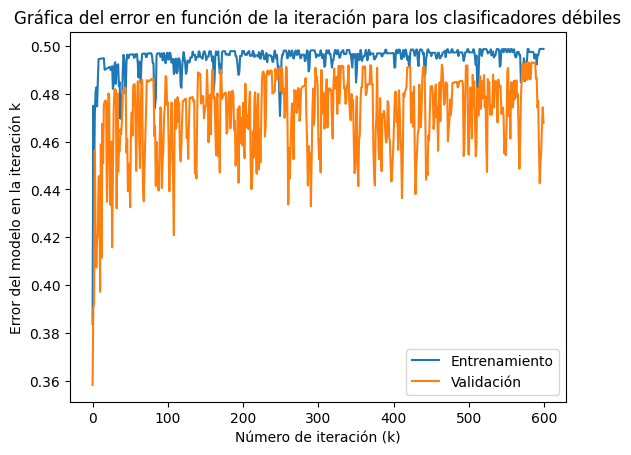

In [14]:
N_puntos = 600
iteracion = np.linspace(0,N_puntos - 1, N_puntos)
errores_train = list(map(lambda x: x['Error'], modelo_adaboost_train))[:N_puntos]
errores_val = list(map(lambda x: x['Error'], modelo_adaboost_validate))[:N_puntos]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(iteracion, errores_train, label = 'Entrenamiento')
ax1.plot(iteracion, errores_val, label = 'Validación')
ax1.set_xlabel('Número de iteración (k)')
ax1.set_ylabel('Error del modelo en la iteración k')
ax1.set_title('Gráfica del error en función de la iteración para los clasificadores débiles')
ax1.legend(loc = 'lower right')

In [15]:
def Evaluar_Adaboost(datos, lista_dic_adaboost):
    """
    Esta función retorna la suma f de todos los modelos en Adaboost multiplicados por su respectivo parámetro alpha
    @intput datos <pd.DataFrame>: Datos a los cuales se les va a predecir la etiqueta
    @input lista_dic_adaboost <list>: Lista de diccionarios que tiene toda la información de los valores (por ejemplo alpha) y modelos obtenidos con AdaBoost
    @output <np.array>: Etiquetas predichas por el nuevo modelo compuesto
    """
    suma = 0
    for i in range(len(lista_dic_adaboost)):
        termino = lista_dic_adaboost[i]['alpha']*(2*lista_dic_adaboost[i]['arbol'].predict(datos) - 1)
        suma += termino
    #fin for
    return 0.5*(np.sign(suma) + 1)
#fin funcion

def hallar_aciertos(y, predicción):
    """
    Esta función halla el porcentaje de aciertos de un modelo comparando las etiquetas (y) con el vector de predicciones. 
    @input y <np.array>: vector que contiene las etiquetas reales
    @input predicción <np.array>: vector que contiene las etiquetas predichas por el modelo
    @output Aciertos <float>: porcentaje de aciertos del modelo
    """
    multi = 0.5*((2*y - 1)*(2*predicción -1) + 1) 
    Aciertos = (1/(len(y)))*sum(multi)
    return Aciertos
#fin funcion

In [16]:
evaluacion_train = Evaluar_Adaboost(X_train3, modelo_adaboost_train)
evaluacion_test = Evaluar_Adaboost(X_test3, modelo_adaboost_train)
aciertos_test = hallar_aciertos(y_test3, evaluacion_test)
aciertos_train = hallar_aciertos(y_train3, evaluacion_train)

In [17]:
print("-@AdaBoost-")
dic_mejor_clasificador = min(modelo_adaboost_train, key = lambda x: x['Error'])
exito_mejor_clasificador_train = 1 - dic_mejor_clasificador['Error']
evaluacion_mejor_clasificador_test = dic_mejor_clasificador['arbol'].predict(X_test3)
aciertos_mejor_clasificador_test = hallar_aciertos(y_test3, evaluacion_mejor_clasificador_test)
print("Porcentaje de éxito del mejor clasificador debil en los datos de Entrenamiento: ", exito_mejor_clasificador_train)
print("Porcentaje de éxito del modelo de AdaBoost en los datos de Entrenamiento: ", aciertos_train)
print("Porcentaje de éxito del mejor clasificador debil en los datos de Test: ", aciertos_mejor_clasificador_test)
print("Porcentaje de éxito del modelo de AdaBoost en los datos de Test: ", aciertos_test)

-@AdaBoost-
Porcentaje de éxito del mejor clasificador debil en los datos de Entrenamiento:  0.6162935323383082
Porcentaje de éxito del modelo de AdaBoost en los datos de Entrenamiento:  0.6511194029850746
Porcentaje de éxito del mejor clasificador debil en los datos de Test:  0.5792079207920792
Porcentaje de éxito del modelo de AdaBoost en los datos de Test:  0.6039603960396039


#4.
Evalúe sus tres modelos resultantes en los datos de prueba con métricas apropiadas y
compare su desempeño.

# .
**Entregable:** Notebook de Jupyter en que se describen sus procedimientos, resultados,
análisis de resultados y conclusiones (y por supuesto, el código utilizado). Este informe
debe estar bien estructurado, con buena redacción y ortografía.
